In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

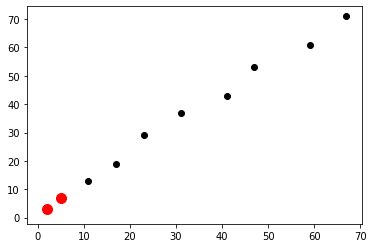

In [2]:
list_x = [2, 5, 11, 17, 23, 31, 41, 47, 59, 67]
list_y = [3, 7, 13, 19, 29, 37, 43, 53, 61, 71]
X = np.array(list(zip(list_x, list_y)))
plt.scatter(list_x,list_y,c = 'black')
plt.scatter(list_x[0],list_y[0],c = 'red',s = 100)
plt.scatter(list_x[1],list_y[1],c = 'red',s = 100)
plt.show()


In [3]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [4]:
#select first 2 2d points as initial centroids
x = [list_x[0],list_x[1]]
y = [list_y[0],list_y[1]]
C = np.array(list(zip(x, y)))
print(C)

[[2 3]
 [5 7]]


In [5]:
#kmeans clustering 
def kmeans_cl():
    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    # Loop will run till the error becomes zero
    while error != 0:
        # calculate euclidean distance and Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(2):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
        colors = ['r', 'g']
    fig, ax = plt.subplots()
    for i in range(2):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=30, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black')

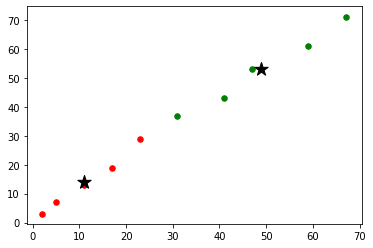

In [6]:
kmeans_cl()

In [7]:
#select first and last 2d points as initial centroids
x = [list_x[0],list_x[9]]
y = [list_y[0],list_y[9]]
C = np.array(list(zip(x, y)))
print(C)

[[ 2  3]
 [67 71]]


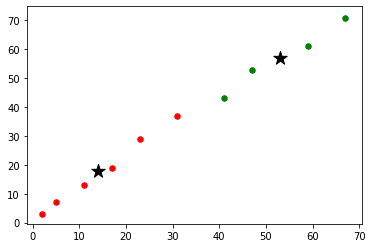

In [8]:
#Call kmeans function to classify and plot
kmeans_cl()